# Analysis

For each query specified in the assignment, compute the answers. Include a plot of
these results in this notebook. Briefly discuss what you can observe from these results. Beware that for some queries, not all of the sub-dataset types have the information required to answer the query. In that case, please ignore those sub-datasets

### Monthly Total Number of trips

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
import pandas as pd
import numpy as np

df_yellow = pd.read_csv("C:\\Users\\ivomb\\OneDrive\\Msc Data Science\\INFOH600-Computing Foundations\\Project\\df_yellow.csv")
df_green = pd.read_csv("C:\\Users\\ivomb\\OneDrive\\Msc Data Science\\INFOH600-Computing Foundations\\Project\\df_green.csv")
df_fhv = pd.read_csv("C:\\Users\\ivomb\\OneDrive\\Msc Data Science\\INFOH600-Computing Foundations\\Project\\df_fhv.csv")
df_fhvhv = pd.read_csv("C:\\Users\\ivomb\\OneDrive\\Msc Data Science\\INFOH600-Computing Foundations\\Project\\df_fhvhv.csv")

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [4]:
df_y = pd.DataFrame(df_yellow.groupby('trip_month').size(),columns=['Number_of_Records'])
df_y['Trip_Month']= df_y.index

In [5]:
df_g = pd.DataFrame(df_green.groupby('trip_month').size(),columns=['Number_of_Records'])
df_g['Trip_Month']= df_g.index

In [6]:
df_f = pd.DataFrame(df_fhv.groupby('trip_month').size(),columns=['Number_of_Records'])
df_f['Trip_Month']= df_f.index

In [7]:
df_fv = pd.DataFrame(df_fhvhv.groupby('trip_month').size(),columns=['Number_of_Records'])
df_fv['Trip_Month']= df_fv.index

In [8]:
df_concat = pd.concat([df_y['Number_of_Records'], df_g['Number_of_Records'], df_f['Number_of_Records'], df_fv['Number_of_Records']], axis=1)
df_concat.set_axis(["yellow", "green","fhv","fhvhv"], axis=1, inplace=True)
df_concat

,yellow,green,fhv,fhvhv
trip_month,,,,
1,278903,13273,78806,41138.0
2,265776,13572,35221,40290.0
3,281493,14230,41844,74488.0
4,276731,13742,40337,52045.0
5,280122,14183,40763,56792.0
6,267732,13123,64023,57066.0
7,240028,11390,66372,NaN
8,228143,11225,67260,NaN
9,243834,11131,67033,NaN


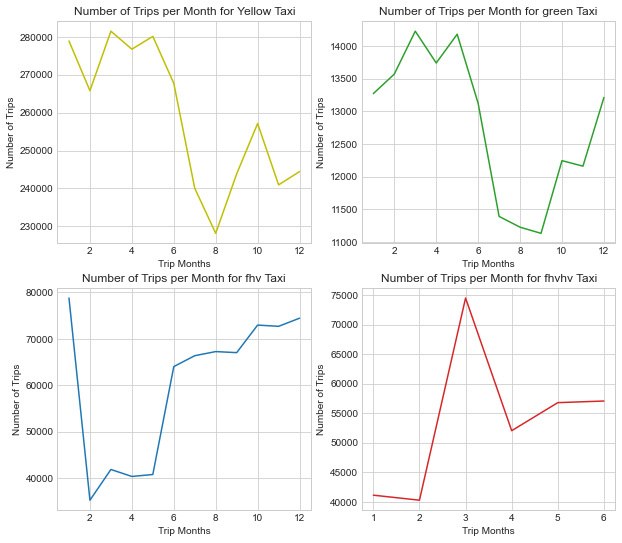

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10,9))
axs[0, 0].plot(df_y['Trip_Month'],df_y['Number_of_Records'],'y')
axs[0, 0].set_title("Number of Trips per Month for Yellow Taxi")
axs[0, 1].plot(df_g['Trip_Month'],df_g['Number_of_Records'], 'tab:green')
axs[0, 1].set_title("Number of Trips per Month for green Taxi")
axs[1, 0].plot(df_f['Trip_Month'],df_f['Number_of_Records'], 'tab:blue')
axs[1, 0].set_title("Number of Trips per Month for fhv Taxi")
axs[1, 1].plot(df_fv['Trip_Month'],df_fv['Number_of_Records'], 'tab:red')
axs[1, 1].set_title("Number of Trips per Month for fhvhv Taxi")

for ax in axs.flat:
    ax.set(xlabel='Trip Months', ylabel='Number of Trips')


#### Monthly total number of trips in Manhattan and Brooklyn

In [10]:
df_value = pd.read_csv("C:\\Users\\ivomb\\Downloads\\taxi+_zone_lookup.csv")
df_value = df_value[df_value['Borough'].isin(['Manhattan', 'Brooklyn'])]
df_value.head()

,LocationID,Borough,Zone,service_zone
3,4,Manhattan,Alphabet City,Yellow Zone
10,11,Brooklyn,Bath Beach,Boro Zone
11,12,Manhattan,Battery Park,Yellow Zone
12,13,Manhattan,Battery Park City,Yellow Zone
13,14,Brooklyn,Bay Ridge,Boro Zone


In [11]:
df_y = df_yellow[df_yellow['pulocationid'].isin(df_value['LocationID'])]
df_y = pd.DataFrame(df_y.groupby('trip_month').size(),columns=['Number_of_Records'])
df_y['Trip_Month']= df_y.index

In [12]:
df_g = df_green[df_yellow['pulocationid'].isin(df_value['LocationID'])]
df_g = pd.DataFrame(df_g.groupby('trip_month').size(),columns=['Number_of_Records'])
df_g['Trip_Month']= df_g.index

In [13]:
df_f = df_fhv[df_yellow['pulocationid'].isin(df_value['LocationID'])]
df_f = pd.DataFrame(df_f.groupby('trip_month').size(),columns=['Number_of_Records'])
df_f['Trip_Month']= df_f.index


In [14]:
df_fv = df_fhvhv[df_yellow['pulocationid'].isin(df_value['LocationID'])]
df_fv = pd.DataFrame(df_fv.groupby('trip_month').size(),columns=['Number_of_Records'])
df_fv['Trip_Month']= df_fv.index


In [15]:
df_concat = pd.concat([df_y['Number_of_Records'], df_g['Number_of_Records'], df_f['Number_of_Records'], df_fv['Number_of_Records']], axis=1)
df_concat.set_axis(["yellow", "green","fhv","fhvhv"], axis=1, inplace=True)
df_concat

,yellow,green,fhv,fhvhv
trip_month,,,,
1,263737,12659,74952,38970.0
2,252229,12997,33401,38604.0
3,266206,13581,39817,71147.0
4,261441,13133,38333,49635.0
5,263728,13564,38950,54040.0
6,251904,12527,61290,54052.0
7,225738,10907,63427,NaN
8,213907,10747,64145,NaN
9,229248,10626,63723,NaN


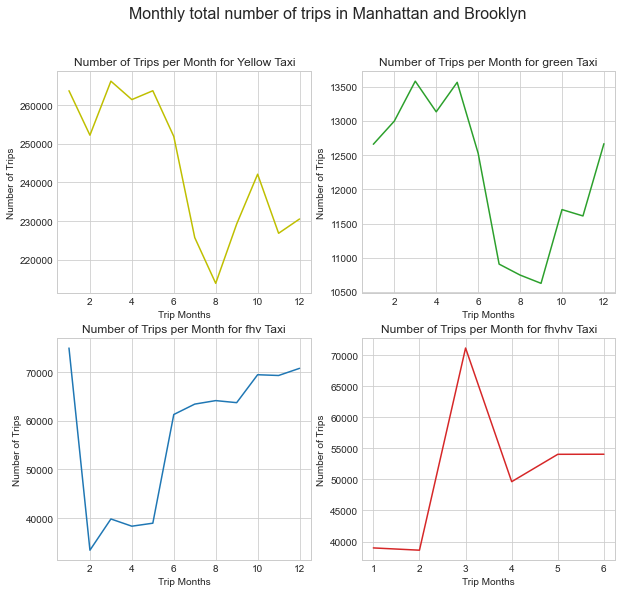

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10,9))
axs[0, 0].plot(df_y['Trip_Month'],df_y['Number_of_Records'],'y')
axs[0, 0].set_title("Number of Trips per Month for Yellow Taxi")
axs[0, 1].plot(df_g['Trip_Month'],df_g['Number_of_Records'], 'tab:green')
axs[0, 1].set_title("Number of Trips per Month for green Taxi")
axs[1, 0].plot(df_f['Trip_Month'],df_f['Number_of_Records'], 'tab:blue')
axs[1, 0].set_title("Number of Trips per Month for fhv Taxi")
axs[1, 1].plot(df_fv['Trip_Month'],df_fv['Number_of_Records'], 'tab:red')
axs[1, 1].set_title("Number of Trips per Month for fhvhv Taxi")
fig.suptitle('Monthly total number of trips in Manhattan and Brooklyn', fontsize=16)

for ax in axs.flat:
    ax.set(xlabel='Trip Months', ylabel='Number of Trips')

In [6]:
sum(df_yellow['tot_amount'])

83921578.87887566

### Monthly total receipts, grouped per dataset type

In [68]:
df_y = df_yellow.groupby(['trip_month']).agg({'tot_amount':'sum'})
df_y['Trip_Month']= df_y.index

In [69]:
df_g = df_green.groupby(['trip_month']).agg({'tot_amount':'sum'})
df_g['Trip_Month']= df_g.index


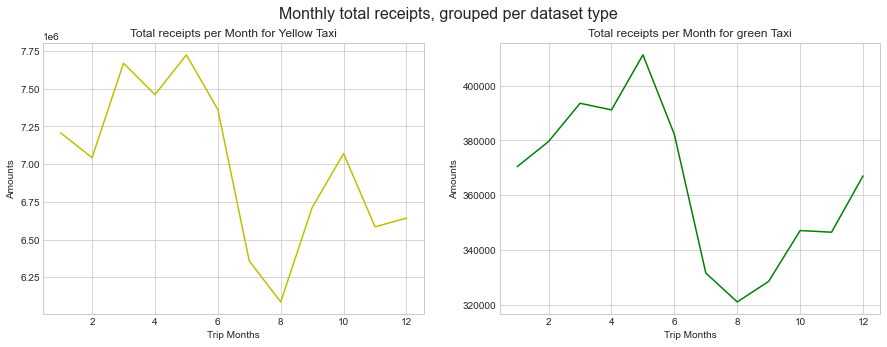

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(df_y['Trip_Month'],df_y['tot_amount'],'y')
axs[0].set_title("Total receipts per Month for Yellow Taxi")
axs[1].plot(df_g['Trip_Month'],df_g['tot_amount'],'g')
axs[1].set_title("Total receipts per Month for green Taxi")


fig.suptitle('Monthly total receipts, grouped per dataset type', fontsize=16)

for ax in axs.flat:
    ax.set(xlabel='Trip Months', ylabel='Amounts')

In [71]:
df_concat = pd.concat([df_y['tot_amount'], df_g['tot_amount']], axis=1)
df_concat.set_axis(["yellow", "green"], axis=1, inplace=True)
df_concat

,yellow,green
trip_month,,
1,7.207524e+06,370419.96
2,7.043251e+06,379623.25
3,7.669549e+06,393570.15
4,7.461294e+06,391156.84
5,7.725209e+06,411261.19
6,7.362377e+06,382177.71
7,6.357447e+06,331568.85
8,6.085890e+06,321008.86
9,6.712307e+06,328535.02


### Average trip receipt grouped per dataset type

In [72]:
df_y = df_yellow.groupby(['trip_month']).agg({'tot_amount':'mean'})
df_y['Trip_Month']= df_y.index

In [73]:
df_g = df_green.groupby(['trip_month']).agg({'tot_amount':'mean'})
df_g['Trip_Month']= df_g.index

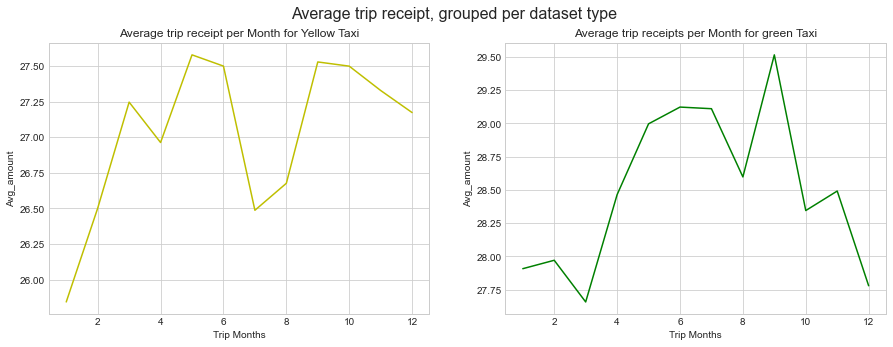

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(df_y['Trip_Month'],df_y['tot_amount'],'y')
axs[0].set_title("Average trip receipt per Month for Yellow Taxi")
axs[1].plot(df_g['Trip_Month'],df_g['tot_amount'],'g')
axs[1].set_title("Average trip receipts per Month for green Taxi")


fig.suptitle('Average trip receipt, grouped per dataset type', fontsize=16)

for ax in axs.flat:
    ax.set(xlabel='Trip Months', ylabel='Avg_amount')

In [76]:
df_concat = pd.concat([df_y['tot_amount'], df_g['tot_amount']], axis=1)
df_concat.set_axis(["yellow", "green"], axis=1, inplace=True)
df_concat

,yellow,green
trip_month,,
1,25.842403,27.907780
2,26.500703,27.971062
3,27.245967,27.657776
4,26.962263,28.464331
5,27.578016,28.996770
6,27.499054,29.122739
7,26.486271,29.110522
8,26.675769,28.597671
9,27.528182,29.515319


### Average cost per in-progress-minute

In [139]:
df_green['drip_duration'] = (pd.to_datetime(df_green['lpep_dropoff_datetime']) - pd.to_datetime(df_green['lpep_pickup_datetime'])).astype('timedelta64[m]')
df_green['progress_avg_cost'] = df_green['tot_amount']/df_green['drip_duration']
df_green = df_green.replace([np.inf, -np.inf], np.nan)


In [140]:
df_g = df_green.groupby(['trip_month']).agg({'progress_avg_cost':'mean'})
df_g['Trip_Month']= df_g.index


In [141]:
df_yellow['drip_duration'] = abs(pd.to_datetime(df_yellow['tpep_pickup_datetime']) - pd.to_datetime(df_yellow['tpep_dropoff_datetime'])).astype('timedelta64[m]')
df_yellow['progress_avg_cost'] = df_yellow['tot_amount']/df_yellow['drip_duration']
df_yellow = df_yellow.replace([np.inf, -np.inf], np.nan)

In [142]:
df_y = df_yellow.groupby(['trip_month']).agg({'progress_avg_cost':'mean'})
df_y['Trip_Month']= df_y.index


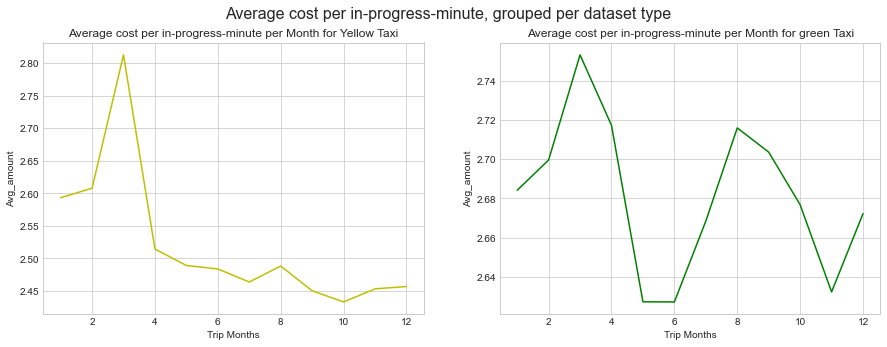

In [143]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(df_y['Trip_Month'],df_y['progress_avg_cost'],'y')
axs[0].set_title("Average cost per in-progress-minute per Month for Yellow Taxi")
axs[1].plot(df_g['Trip_Month'],df_g['progress_avg_cost'],'g')
axs[1].set_title("Average cost per in-progress-minute per Month for green Taxi")


fig.suptitle('Average cost per in-progress-minute, grouped per dataset type', fontsize=16)

for ax in axs.flat:
    ax.set(xlabel='Trip Months', ylabel='Avg_cost')

In [144]:
df_concat = pd.concat([df_y['progress_avg_cost'], df_g['progress_avg_cost']], axis=1)
df_concat.set_axis(["yellow", "green"], axis=1, inplace=True)
df_concat

,yellow,green
trip_month,,
1,2.593218,2.684080
2,2.607850,2.699530
3,2.812600,2.753140
4,2.514500,2.717208
5,2.489176,2.627220
6,2.483904,2.627158
7,2.463850,2.668381
8,2.488394,2.715890
9,2.450413,2.703537


### Average tip per trip grouped per dataset type

In [77]:
df_y = df_yellow.groupby(['trip_month']).agg({'tip_amount':'mean'})
df_y['Trip_Month']= df_y.index

In [78]:
df_g = df_green.groupby(['trip_month']).agg({'tip_amount':'mean'})
df_g['Trip_Month']= df_g.index

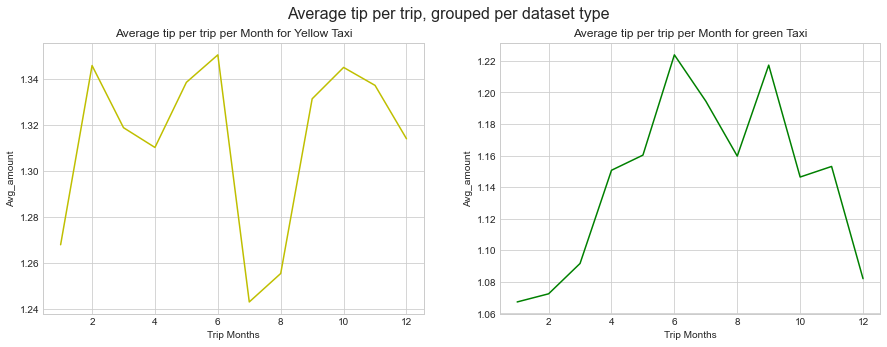

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(df_y['Trip_Month'],df_y['tip_amount'],'y')
axs[0].set_title("Average tip per trip per Month for Yellow Taxi")
axs[1].plot(df_g['Trip_Month'],df_g['tip_amount'],'g')
axs[1].set_title("Average tip per trip per Month for green Taxi")


fig.suptitle('Average tip per trip, grouped per dataset type', fontsize=16)

for ax in axs.flat:
    ax.set(xlabel='Trip Months', ylabel='Avg_amount')

In [80]:
df_concat = pd.concat([df_y['tip_amount'], df_g['tip_amount']], axis=1)
df_concat.set_axis(["yellow", "green"], axis=1, inplace=True)
df_concat

,yellow,green
trip_month,,
1,1.267867,1.067211
2,1.345943,1.072369
3,1.318867,1.091592
4,1.310256,1.150647
5,1.338620,1.160241
6,1.350596,1.223774
7,1.242953,1.194431
8,1.255354,1.159619
9,1.331444,1.217257


### Median monthly average trip speed,  grouped per dataset type